In [13]:
from tensorflow.keras.datasets.mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data(path = 'mnist.npz')

In [14]:
# 학습 데이터
print(x_train.shape, y_train.shape)
print(y_train)

# 테스트 데이터
print(x_test.shape, y_test.shape)
print(y_test)

(60000, 28, 28) (60000,)
[5 0 4 ... 5 6 8]
(10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]


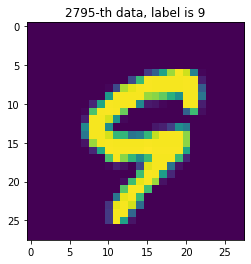

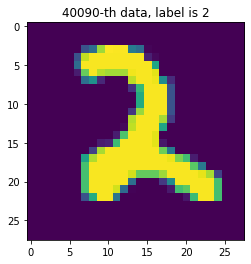

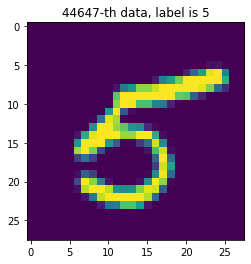

In [15]:
import matplotlib.pyplot as plt
import numpy as np

sample_size = 3
# 0~59999의 범위에서 무작위로 세 개의 정수 뽑기
random_idx = np.random.randint(60000, size=sample_size)

for idx in random_idx:
    img = x_train[idx, :]
    label = y_train[idx]
    plt.figure()
    plt.imshow(img)
    plt.title('%d-th data, label is %d' % (idx, label))

In [16]:
from sklearn.model_selection import train_test_split

# 훈련/테스트 데이터를 0.7/0.3의 비율로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state=777)
print(f'훈련 데이터 {x_train.shape} 레이블 {y_train.shape}')
print(f'검증 데이터 {x_val.shape} 레이블 {y_val.shape}')

훈련 데이터 (42000, 28, 28) 레이블 (42000,)
검증 데이터 (18000, 28, 28) 레이블 (18000,)


In [17]:
num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

# 모델의 입력으로 사용하기 위한 전처리
x_train = (x_train.reshape((num_x_train, 28 * 28))) / 255
x_val = (x_val.reshape((num_x_val, 28 * 28))) / 255
x_test = (x_test.reshape((num_x_test, 28 * 28))) / 255

print(x_train.shape)    # 모델 입력을 위해 데이터를 784 차원으로 변경

(42000, 784)


### 모델 입력을 위한 레이블 전처리

In [18]:
from tensorflow.keras.utils import to_categorical

# 각 데이터의 레이블을 범주형 형태로 변경
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print(y_train)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
# 입력 데이터의 형태를 꼭 명시해야 함
# 784차원의 데이터를 입력으로 받고, 64개의 출력을 가지는 첫번째 Dense층
model.add(Dense(64, activation = 'relu', input_shape = (784, )))
model.add(Dense(32, activation = 'relu'))       # 32개의 출력을 가지는 Dense층
model.add(Dense(10, activation = 'softmax'))    # 10개의 출력을 가지는 신경망

### 소프트맥스와 시그모이드 값의 비교

In [22]:
def softmax(arr):
    m = np.max(arr)
    arr = arr - m   # exp의 오버플로우 방지
    arr = np.exp(arr)
    return arr / np.sum(arr)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

case_1 = np.array([3.1, 3.0, 2.9])
case_2 = np.array([2.0, 1.0, 0.7])

np.set_printoptions(precision=3)    # numpy 소수점 제한
print(f'sigmoid {sigmoid(case_1)}, softmax {softmax(case_1)}')
print(f'sigmoid {sigmoid(case_2)}, softmax {softmax(case_2)}')


sigmoid [0.957 0.953 0.948], softmax [0.367 0.332 0.301]
sigmoid [0.881 0.731 0.668], softmax [0.61  0.224 0.166]


### 학습과정 설정

In [23]:
model.compile(optimizer='adam',     # 옵티마이저: Adam 
            # 손실함수: categorical_crossentropy
            loss = 'categorical_crossentropy',
            # 모니터링 할 평가지표: acc
            metrics = ['acc']
)

### 모델 학습하기

In [24]:
history = model.fit(x_train, y_train,
                    epochs = 30,
                    batch_size = 128,
                    validation_data = (x_val, y_val))

Epoch 1/30
329/329 [==============================] - 1s 3ms/step - loss: 0.5276 - acc: 0.8477 - val_loss: 0.2446 - val_acc: 0.9314
Epoch 2/30
329/329 [==============================] - 1s 3ms/step - loss: 0.2143 - acc: 0.9387 - val_loss: 0.1885 - val_acc: 0.9472
Epoch 3/30
329/329 [==============================] - 1s 3ms/step - loss: 0.1602 - acc: 0.9544 - val_loss: 0.1629 - val_acc: 0.9539
Epoch 4/30
329/329 [==============================] - 1s 2ms/step - loss: 0.1298 - acc: 0.9634 - val_loss: 0.1372 - val_acc: 0.9601
Epoch 5/30
329/329 [==============================] - 1s 3ms/step - loss: 0.1064 - acc: 0.9699 - val_loss: 0.1340 - val_acc: 0.9603
Epoch 6/30
329/329 [==============================] - 1s 3ms/step - loss: 0.0921 - acc: 0.9726 - val_loss: 0.1301 - val_acc: 0.9596
Epoch 7/30
329/329 [==============================] - 1s 3ms/step - loss: 0.0801 - acc: 0.9768 - val_loss: 0.1135 - val_acc: 0.9668
Epoch 8/30
329/329 [==============================] - 1s 3ms/step - loss: 0.

### history를 통해 확인해볼 수 있는 값 출력

In [29]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

### 학습 결과 그려보기

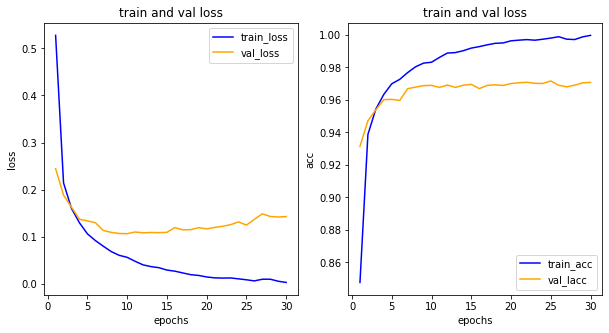

In [32]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']     # 검증 데이터가 있는 경우 val_ 수식어가 붙음

epochs = range(1, len(loss) +1)
fig = plt.figure(figsize = (10, 5))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_lacc')
ax2.set_title('train and val loss')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

### 모델 평가하기

In [33]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1327 - acc: 0.9719


[0.13268208503723145, 0.9718999862670898]

### 학습된 모델을 통해 값 예측하기

In [34]:
import numpy as np

results = model.predict(x_test)
print(results.shape)
np.set_printoptions(precision=7)    # numpy 소수점 제한
print(f'각 클래스에 속할 확률: \n{results [0]}')

(10000, 10)
각 클래스에 속할 확률: 
[2.8914952e-11 7.4276560e-13 2.2505526e-09 3.3910581e-04 4.4974763e-17
 2.3167241e-09 1.1297637e-17 9.9966085e-01 6.8513201e-10 5.2138129e-09]


### 예측값 그려서 확인해보기

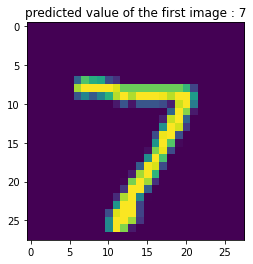

In [35]:
import matplotlib.pyplot as plt

arg_results = np.argmax(results, axis = -1)     # 가장 큰 값의 인덱스를 가져옴
plt.imshow(x_test[0].reshape(28, 28))
plt.title('predicted value of the first image : ' + str(arg_results[0]))
plt.show()

### 모델 평가 방법 1-혼동행렬

In [36]:
# sklearn.metrics 모듈은 여러가지 평가지표에 관한 기능을 제공
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

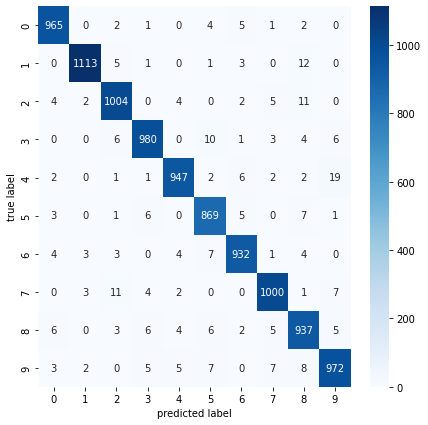

In [37]:
# 혼동행렬을 만듬
plt.figure(figsize = (7, 7))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

### 모델 평가 방법-2 분류 보고서

In [38]:
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))


               precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.98      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.96      0.97      0.97       892
           6       0.97      0.97      0.97       958
           7       0.98      0.97      0.97      1028
           8       0.95      0.96      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

